In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

/Users/jasminecjwchen/Documents/GitHub/COMS4995-AML-Project/.venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import math

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.calibration import LabelEncoder

In [5]:
from scikeras.wrappers import KerasClassifier

In [6]:
%matplotlib inline
sns.set_theme()

In [7]:
df = pd.read_csv("kaggle_survey_2020_responses.csv")

In [8]:
salary_data = df.drop(columns = ["time_from_start_to_finish_seconds"])

In [9]:
salary_data_as_num = pd.DataFrame()

In [10]:
def convert_to_category(col_name: str, order_rules: list, data):
    data[col_name] = pd.Categorical(data[col_name], order_rules)

In [11]:
def convert_to_category_no_specified_order(col_name, data):
    if sum(data[col_name].isna().astype(int)) > 0:
        data[col_name].fillna("No response", inplace = True)
    
    order = list(set(data[col_name]))
    convert_to_category(col_name, order, data)

In [12]:
def convert_category_to_code(col_name: str, data, inplace = False):
    if inplace:
        data[col_name] = data[col_name].cat.codes + 1 # because NaN automatically becomes -1
    else:
        return data[col_name].cat.codes + 1

In [13]:
def process_column(col_name: str, order_rules = None, data = salary_data, num_data = salary_data_as_num):
    if order_rules:
        convert_to_category(col_name, order_rules, data)
    else:
        convert_to_category_no_specified_order(col_name, data)
    num_data[col_name] = convert_category_to_code(col_name, data)

In [14]:
def one_hot_column_to_binary(col_name, data = salary_data):
    data[col_name].fillna(0, inplace = True)
    data[col_name].mask(data[col_name] != 0, 1, inplace = True)

In [15]:
def process_one_hot_encoded_columns(columns, data = salary_data, num_data = salary_data_as_num):
    for col in columns:
        one_hot_column_to_binary(col, data)
        num_data[col] = data[col]

In [16]:
def column_text_to_binary(col_name, data = salary_data, num_data = salary_data_as_num):
    data[col_name] = data[col_name].notna().astype(int)
    num_data[col_name] = data[col_name]

In [17]:
def combine_multiple_columns_into_one_binary(columns, new_col_name, data = salary_data, num_data = salary_data_as_num):
    for col_name in columns:
        one_hot_column_to_binary(col_name)
        
    data[new_col_name] = data[columns].sum(axis = 1)
    data[new_col_name] = data[new_col_name].astype(int)
    
    data[new_col_name].mask(data[new_col_name] > 0, 1, inplace = True)
    num_data[new_col_name] = data[new_col_name]

## Q24 Target Column

### v1: original bins

In [18]:
q24_order = ["$0-999",
             '1,000-1,999',
             '2,000-2,999',
             '3,000-3,999',
             '4,000-4,999',
             '5,000-7,499',
             '7,500-9,999',
             '10,000-14,999',
             '15,000-19,999',
             '20,000-24,999',
             '25,000-29,999',
             '30,000-39,999',
             '40,000-49,999',
             '50,000-59,999',
              '60,000-69,999',
              '70,000-79,999',
              '80,000-89,999',
              '90,000-99,999',
            '100,000-124,999',
            '125,000-149,999',
            '150,000-199,999',
             '200,000-249,999',
             '250,000-299,999',
              '300,000-500,000',
              '> $500,000'
             ]

In [19]:
process_column("q24", q24_order)

## Q1 Age

In [20]:
salary_data["q1"].value_counts()

q1
25-29    4011
22-24    3786
18-21    3469
30-34    2811
35-39    1991
40-44    1397
45-49     988
50-54     698
55-59     411
60-69     398
70         76
Name: count, dtype: int64

In [21]:
q1_order = [
    "18-21",
    "22-24",
    "25-29",
    "30-34",
    "35-39",
    "40-44",
    "45-49",
    "50-54",
    "55-59",
    "60-69",
    "70"
]

In [22]:
convert_to_category("q1", q1_order, salary_data)

In [23]:
salary_data_as_num["q1"] = convert_category_to_code("q1", salary_data, False)
salary_data_as_num

,q24,q1
0,0,5
1,19,4
2,9,5
3,20,4
4,0,4
...,...,...
20031,0,1
20032,0,9
20033,1,4
20034,1,2


In [24]:
salary_data_as_num["q1"].value_counts()

q1
3     4011
2     3786
1     3469
4     2811
5     1991
6     1397
7      988
8      698
9      411
10     398
11      76
Name: count, dtype: int64

## Q2 Gender

In [25]:
salary_data["q2"].value_counts()

q2
Man                        15789
Woman                       3878
Prefer not to say            263
Prefer to self-describe       54
Nonbinary                     52
Name: count, dtype: int64

In [26]:
q2_order = ['Man', "Woman", "Nonbinary", 'Prefer to self-describe', 'Prefer not to say']

In [27]:
convert_to_category("q2", q2_order, salary_data)

In [28]:
salary_data_as_num["q2"] = convert_category_to_code("q2", salary_data, False)
salary_data_as_num

,q24,q1,q2
0,0,5,1
1,19,4,1
2,9,5,1
3,20,4,1
4,0,4,1
...,...,...,...
20031,0,1,1
20032,0,9,2
20033,1,4,1
20034,1,2,1


In [29]:
salary_data_as_num["q2"].value_counts()

q2
1    15789
2     3878
5      263
4       54
3       52
Name: count, dtype: int64

## Q3 Country

In [30]:
convert_to_category_no_specified_order("q3", salary_data)

In [31]:
salary_data_as_num["q3"] = convert_category_to_code("q3", salary_data)

## Q4 Education

In [32]:
salary_data["q4"].value_counts()

q4
Master’s degree                                                      7859
Bachelor’s degree                                                    6978
Doctoral degree                                                      2302
Some college/university study without earning a bachelor’s degree    1092
Professional degree                                                   699
I prefer not to answer                                                399
No formal education past high school                                  240
Name: count, dtype: int64

In [33]:
q4_order = ["No formal education past high school",
            "Some college/university study without earning a bachelor’s degree",
            "Professional degree",
            "Bachelor’s degree",
            "Master’s degree",
            "Doctoral degree",
            "I prefer not to answer"
            ]

In [34]:
convert_to_category("q4", q4_order, salary_data)

In [35]:
salary_data_as_num["q4"] = convert_category_to_code("q4", salary_data)

In [36]:
salary_data_as_num["q4"].value_counts()

q4
5    7859
4    6978
6    2302
2    1092
3     699
0     467
7     399
1     240
Name: count, dtype: int64

## Q5 Job Title

In [37]:
salary_data["q5"].value_counts()

q5
Student                      5171
Data Scientist               2676
Software Engineer            1968
Other                        1737
Currently not employed       1652
Data Analyst                 1475
Research Scientist           1174
Machine Learning Engineer    1082
Business Analyst              798
Product/Project Manager       692
Data Engineer                 437
Statistician                  290
DBA/Database Engineer         125
Name: count, dtype: int64

In [38]:
convert_to_category_no_specified_order("q5", salary_data)

In [39]:
salary_data_as_num["q5"] = convert_category_to_code("q5", salary_data)

## Q6 Years Coding

In [40]:
q6_order = [
 'I have never written code',
 '< 1 years',
 '1-2 years',
 '3-5 years',
 '5-10 years',
 '10-20 years',
 '20+ years']

In [41]:
process_column("q6", q6_order)

## Q7 Language

In [42]:
q7_columns = [
     'q7_part_1',
 'q7_part_2',
 'q7_part_3',
 'q7_part_4',
 'q7_part_5',
 'q7_part_6',
 'q7_part_7',
 'q7_part_8',
 'q7_part_9',
 'q7_part_10',
 'q7_part_11',
 'q7_part_12',
 'q7_other'
]

In [43]:
process_one_hot_encoded_columns(q7_columns)

## Q11 Computing Platform

In [44]:
process_column("q11")

## Q12 Specialized Hardware

In [45]:
q12_columns = [
    'q12_part_1',
 'q12_part_2',
 'q12_part_3',
 'q12_other'
]

In [46]:
process_one_hot_encoded_columns(q12_columns)

## Q14 Visualization

In [47]:
q14_columns = [
    'q14_part_1',
 'q14_part_2',
 'q14_part_3',
 'q14_part_4',
 'q14_part_5',
 'q14_part_6',
 'q14_part_7',
 'q14_part_8',
 'q14_part_9',
 'q14_part_10',
 'q14_part_11',
 'q14_other'
]

In [48]:
process_one_hot_encoded_columns(q14_columns)

## Q15 Years ML

In [49]:
q15_order = [
    'I do not use machine learning methods',
    'Under 1 year',
    '1-2 years',
    '2-3 years',
    '3-4 years',
    '4-5 years',
    '5-10 years',
    '10-20 years',
    '20 or more years'
]

In [50]:
process_column("q15", q15_order)

## Q17 ML Algorithms

In [51]:
q17_columns = [
    'q17_part_1',
 'q17_part_2',
 'q17_part_3',
 'q17_part_4',
 'q17_part_5',
 'q17_part_6',
 'q17_part_7',
 'q17_part_8',
 'q17_part_9',
 'q17_part_10',
 'q17_part_11',
 'q17_other'
]

In [52]:
process_one_hot_encoded_columns(q17_columns)

## Q20 Company Size

In [53]:
q20_order = [
    '0-49 employees',
    '50-249 employees',
    '250-999 employees',
    '1000-9,999 employees',
    '10,000 or more employees'
]

In [54]:
process_column("q20", q20_order)

## Q21 Datascience Workloads

In [55]:
q21_order = [
    '0',
    '1-2',
    '3-4',
    '5-9',
    '10-14',
    '15-19',
    '20'
]

In [56]:
process_column("q21", q21_order)

## Q22 Incorporating ML

i'm not super sure about the proper "order" for this question. Feel free to change this if you find it more appropriate. Just please let the chat know in case it affects others' encoding.

In [57]:
q22_order = [
    'I do not know',
    'No (we do not use ML methods)',
    'We are exploring ML methods (and may one day put a model into production)',
    'We use ML methods for generating insights (but do not put working models into production)',
    'We recently started using ML methods (i.e., models in production for less than 2 years)',
    'We have well established ML methods (i.e., models in production for more than 2 years)'
]

In [58]:
process_column("q22", q22_order)

## Q30 Big Data Products

In [59]:
column_text_to_binary("q30")

## Q32 Business Intelligence Tools

In [60]:
column_text_to_binary("q32")

## Q33 Automated ML Tools

In [61]:
q33_columns = [
    'q33_a_part_1',
 'q33_a_part_2',
 'q33_a_part_3',
 'q33_a_part_4',
 'q33_a_part_5',
 'q33_a_part_6',
 'q33_a_part_7',
 'q33_a_other'
]

In [62]:
combine_multiple_columns_into_one_binary(q33_columns, "q33")

## Q37 Data Science Courses

In [63]:
q37_columns = [
    'q37_part_1',
 'q37_part_2',
 'q37_part_3',
 'q37_part_4',
 'q37_part_5',
 'q37_part_6',
 'q37_part_7',
 'q37_part_8',
 'q37_part_9',
 'q37_part_10',
 'q37_part_11',
 'q37_other'
]

In [64]:
process_one_hot_encoded_columns(q37_columns)

## Q38 Primary Data Analysis Tool

In [65]:
process_column("q38")

## Q39 Media Sources

In [66]:
q39_columns = [
    'q39_part_1',
 'q39_part_2',
 'q39_part_3',
 'q39_part_4',
 'q39_part_5',
 'q39_part_6',
 'q39_part_7',
 'q39_part_8',
 'q39_part_9',
 'q39_part_10',
 'q39_part_11',
 'q39_other'
]

In [67]:
process_one_hot_encoded_columns(q39_columns)

## Dropped Columns

In [68]:
one_hot_dropped = [
    'q33_a_part_1',
 'q33_a_part_2',
 'q33_a_part_3',
 'q33_a_part_4',
 'q33_a_part_5',
 'q33_a_part_6',
 'q33_a_part_7',
 'q33_a_other',
]

In [69]:
dropped_questions = [
    "q8",
    'q9_part_1',
 'q9_part_2',
 'q9_part_3',
 'q9_part_4',
 'q9_part_5',
 'q9_part_6',
 'q9_part_7',
 'q9_part_8',
 'q9_part_9',
 'q9_part_10',
 'q9_part_11',
 'q9_other',
 'q10_part_1',
 'q10_part_2',
 'q10_part_3',
 'q10_part_4',
 'q10_part_5',
 'q10_part_6',
 'q10_part_7',
 'q10_part_8',
 'q10_part_9',
 'q10_part_10',
 'q10_part_11',
 'q10_part_12',
 'q10_part_13',
 'q10_other',
 "q13",
 'q16_part_1',
 'q16_part_2',
 'q16_part_3',
 'q16_part_4',
 'q16_part_5',
 'q16_part_6',
 'q16_part_7',
 'q16_part_8',
 'q16_part_9',
 'q16_part_10',
 'q16_part_11',
 'q16_part_12',
 'q16_part_13',
 'q16_part_14',
 'q16_part_15',
 'q16_other',
 'q18_part_1',
 'q18_part_2',
 'q18_part_3',
 'q18_part_4',
 'q18_part_5',
 'q18_part_6',
 'q18_other',
 'q19_part_1',
 'q19_part_2',
 'q19_part_3',
 'q19_part_4',
 'q19_part_5',
 'q19_other',
 'q23_part_1',
 'q23_part_2',
 'q23_part_3',
 'q23_part_4',
 'q23_part_5',
 'q23_part_6',
 'q23_part_7',
 'q23_other',
 'q25',
 'q26_a_part_1',
 'q26_a_part_2',
 'q26_a_part_3',
 'q26_a_part_4',
 'q26_a_part_5',
 'q26_a_part_6',
 'q26_a_part_7',
 'q26_a_part_8',
 'q26_a_part_9',
 'q26_a_part_10',
 'q26_a_part_11',
 'q26_a_other',
 'q27_a_part_1',
 'q27_a_part_2',
 'q27_a_part_3',
 'q27_a_part_4',
 'q27_a_part_5',
 'q27_a_part_6',
 'q27_a_part_7',
 'q27_a_part_8',
 'q27_a_part_9',
 'q27_a_part_10',
 'q27_a_part_11',
 'q27_a_other',
 'q28_a_part_1',
 'q28_a_part_2',
 'q28_a_part_3',
 'q28_a_part_4',
 'q28_a_part_5',
 'q28_a_part_6',
 'q28_a_part_7',
 'q28_a_part_8',
 'q28_a_part_9',
 'q28_a_part_10',
 'q28_a_other',
 'q29_a_part_1',
 'q29_a_part_2',
 'q29_a_part_3',
 'q29_a_part_4',
 'q29_a_part_5',
 'q29_a_part_6',
 'q29_a_part_7',
 'q29_a_part_8',
 'q29_a_part_9',
 'q29_a_part_10',
 'q29_a_part_11',
 'q29_a_part_12',
 'q29_a_part_13',
 'q29_a_part_14',
 'q29_a_part_15',
 'q29_a_part_16',
 'q29_a_part_17',
 'q29_a_other',
 'q31_a_part_1',
 'q31_a_part_2',
 'q31_a_part_3',
 'q31_a_part_4',
 'q31_a_part_5',
 'q31_a_part_6',
 'q31_a_part_7',
 'q31_a_part_8',
 'q31_a_part_9',
 'q31_a_part_10',
 'q31_a_part_11',
 'q31_a_part_12',
 'q31_a_part_13',
 'q31_a_part_14',
 'q31_a_other',
 'q34_a_part_1',
 'q34_a_part_2',
 'q34_a_part_3',
 'q34_a_part_4',
 'q34_a_part_5',
 'q34_a_part_6',
 'q34_a_part_7',
 'q34_a_part_8',
 'q34_a_part_9',
 'q34_a_part_10',
 'q34_a_part_11',
 'q34_a_other',
 'q35_a_part_1',
 'q35_a_part_2',
 'q35_a_part_3',
 'q35_a_part_4',
 'q35_a_part_5',
 'q35_a_part_6',
 'q35_a_part_7',
 'q35_a_part_8',
 'q35_a_part_9',
 'q35_a_part_10',
 'q35_a_other',
 'q36_part_1',
 'q36_part_2',
 'q36_part_3',
 'q36_part_4',
 'q36_part_5',
 'q36_part_6',
 'q36_part_7',
 'q36_part_8',
 'q36_part_9',
 'q36_other',
]

In [70]:
part_b_dropped = [
    'q26_b_part_1',
 'q26_b_part_2',
 'q26_b_part_3',
 'q26_b_part_4',
 'q26_b_part_5',
 'q26_b_part_6',
 'q26_b_part_7',
 'q26_b_part_8',
 'q26_b_part_9',
 'q26_b_part_10',
 'q26_b_part_11',
 'q26_b_other',
 'q27_b_part_1',
 'q27_b_part_2',
 'q27_b_part_3',
 'q27_b_part_4',
 'q27_b_part_5',
 'q27_b_part_6',
 'q27_b_part_7',
 'q27_b_part_8',
 'q27_b_part_9',
 'q27_b_part_10',
 'q27_b_part_11',
 'q27_b_other',
 'q28_b_part_1',
 'q28_b_part_2',
 'q28_b_part_3',
 'q28_b_part_4',
 'q28_b_part_5',
 'q28_b_part_6',
 'q28_b_part_7',
 'q28_b_part_8',
 'q28_b_part_9',
 'q28_b_part_10',
 'q28_b_other',
 'q29_b_part_1',
 'q29_b_part_2',
 'q29_b_part_3',
 'q29_b_part_4',
 'q29_b_part_5',
 'q29_b_part_6',
 'q29_b_part_7',
 'q29_b_part_8',
 'q29_b_part_9',
 'q29_b_part_10',
 'q29_b_part_11',
 'q29_b_part_12',
 'q29_b_part_13',
 'q29_b_part_14',
 'q29_b_part_15',
 'q29_b_part_16',
 'q29_b_part_17',
 'q29_b_other',
 'q31_b_part_1',
 'q31_b_part_2',
 'q31_b_part_3',
 'q31_b_part_4',
 'q31_b_part_5',
 'q31_b_part_6',
 'q31_b_part_7',
 'q31_b_part_8',
 'q31_b_part_9',
 'q31_b_part_10',
 'q31_b_part_11',
 'q31_b_part_12',
 'q31_b_part_13',
 'q31_b_part_14',
 'q31_b_other',
 'q33_b_part_1',
 'q33_b_part_2',
 'q33_b_part_3',
 'q33_b_part_4',
 'q33_b_part_5',
 'q33_b_part_6',
 'q33_b_part_7',
 'q33_b_other',
 'q34_b_part_1',
 'q34_b_part_2',
 'q34_b_part_3',
 'q34_b_part_4',
 'q34_b_part_5',
 'q34_b_part_6',
 'q34_b_part_7',
 'q34_b_part_8',
 'q34_b_part_9',
 'q34_b_part_10',
 'q34_b_part_11',
 'q34_b_other',
 'q35_b_part_1',
 'q35_b_part_2',
 'q35_b_part_3',
 'q35_b_part_4',
 'q35_b_part_5',
 'q35_b_part_6',
 'q35_b_part_7',
 'q35_b_part_8',
 'q35_b_part_9',
 'q35_b_part_10',
 'q35_b_other'
]

In [71]:
salary_data = salary_data.drop(columns = one_hot_dropped)

In [72]:
salary_data = salary_data.drop(columns = part_b_dropped)

In [73]:
salary_data_selected_questions = salary_data.drop(columns = dropped_questions)

# DNN Model v1

In [74]:
X = salary_data_as_num.drop(columns = ["q24"])
y = salary_data_as_num["q24"]

In [75]:
x_dev, x_test, y_dev, y_test = train_test_split(X, y, test_size = 0.2, random_state = 6)

In [76]:
len(X.columns)

80

In [77]:
x_dev = tf.convert_to_tensor(x_dev.astype("int64"))
x_test = tf.convert_to_tensor(x_test.astype("int64"))
y_dev = tf.convert_to_tensor(y_dev.astype("int64"))
y_test = tf.convert_to_tensor(y_test.astype("int64"))

2023-11-28 16:18:20.577098: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-11-28 16:18:20.577150: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-11-28 16:18:20.577165: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-11-28 16:18:20.577448: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-28 16:18:20.577832: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [78]:
model = Sequential([
    Dense(128, input_shape = (80, ), activation = "relu"),
    Dense(26, activation = "softmax")
])
model.compile("adam", "sparse_categorical_crossentropy", metrics = ["accuracy"])
history_callback = model.fit(x_dev, y_dev, batch_size = 100, epochs = 2, validation_split = 0.2, verbose = 1)

Epoch 1/2


2023-11-28 16:18:21.374123: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


 60/129 [============>.................] - ETA: 0s - loss: 2.8690 - accuracy: 0.3992

129/129 [==============================] - 2s 9ms/step - loss: 2.3547 - accuracy: 0.4574 - val_loss: 1.8070 - val_accuracy: 0.5203
Epoch 2/2
129/129 [==============================] - 1s 7ms/step - loss: 1.7652 - accuracy: 0.5253 - val_loss: 1.6875 - val_accuracy: 0.5452


In [79]:
model.evaluate(x_test, y_test, verbose = 0)

[1.7649109363555908, 0.5227046012878418]

# DNN Model v2

In [90]:
class DNN:
    
    def __init__(self, x_dev = x_dev, y_dev = y_dev, x_test = x_test, y_test = y_test):
        self.x_dev = x_dev
        self.y_dev = y_dev
        self.x_test = x_test
        self.y_test = y_test
        
        self.layers = [Dense(32, input_shape = (80, ), activation = "relu")]
        
        self.optimizer = "adam"
        self.loss = "sparse_categorical_crossentropy"
        self.metrics =  ["accuracy"]
        
        self.batch_size = 100
        self.epochs = 50
        
    def customize_first_layer(self, node_count = 32):
        self.layers = [Dense(node_count, input_shape = (80, ), activation = "relu")]
        
    def customize_middle_layers(self, layers):
        self.layers.extend(layers)
    
    def customize_compile(self,
                          optimizer = "adam",
                          loss = "sparse_categorical_crossentropy",
                          metrics = ["accuracy"]):
        self.optimizer = optimizer
        self.loss = loss
        self.metrics = metrics
    
    def customize_fit(self,
                      batch_size = 100,
                      epochs = 50
                      ):
        self.batch_size = batch_size
        self.epochs = epochs
    
    def build_compile_and_evaluate(self, metric_to_return = "accuracy", selection_criteria = max):
        # final layer must be softmax and outputs 26
        self.layers.append(Dense(26, activation = "softmax"))
        
        self.model = Sequential(self.layers)
        self.model.compile(optimizer = self.optimizer,
                      loss = self.loss,
                      metrics = self.metrics)
        fit_history = self.model.fit(self.x_dev, self.y_dev,
                                batch_size = self.batch_size,
                                epochs = self.epochs,
                                validation_split = 0.2,
                                verbose = 1)
        self.fit_history = pd.DataFrame(fit_history.history)
        return selection_criteria(self.fit_history[metric_to_return])
    
    def get_model_summary(self):
        self.model.summary()
        
    def get_fit_history(self):
        return self.fit_history
        
    def evaluate_model_with_test(self):
        return self.model.evaluate(self.x_test, self.y_test, verbose = 0)

In [81]:
d = DNN()
d.customize_fit(epochs = 5)

In [82]:
d.build_compile_and_evaluate()

Epoch 1/5
129/129 [==============================] - 1s 9ms/step - loss: 3.6649 - accuracy: 0.3497 - val_loss: 2.2721 - val_accuracy: 0.4797
Epoch 2/5
129/129 [==============================] - 1s 10ms/step - loss: 2.1184 - accuracy: 0.4813 - val_loss: 1.9866 - val_accuracy: 0.5066
Epoch 3/5
129/129 [==============================] - 1s 8ms/step - loss: 1.9217 - accuracy: 0.5038 - val_loss: 1.8589 - val_accuracy: 0.5150
Epoch 4/5
129/129 [==============================] - 1s 7ms/step - loss: 1.8136 - accuracy: 0.5196 - val_loss: 1.7719 - val_accuracy: 0.5343
Epoch 5/5
129/129 [==============================] - 1s 8ms/step - loss: 1.7505 - accuracy: 0.5284 - val_loss: 1.7250 - val_accuracy: 0.5381


0.5283886790275574

In [83]:
d.get_model_summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               10368     
                                                                 
 dense_1 (Dense)             (None, 26)                3354      
                                                                 
Total params: 13722 (53.60 KB)
Trainable params: 13722 (53.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# DNN Model v3

## 1 Layer: First Layer Width

In [91]:
first_layer_width_results = []

for i in range(10):
    layer_width = 2 ** i
    print("---- building model for layer width of " + str(layer_width))
    d = DNN()
    d.customize_first_layer(layer_width)
    
    #d.customize_fit(epochs = 2) ## TODO: REMOVE
    
    val_acc_result = d.build_compile_and_evaluate()
    test_loss, test_accuracy = d.evaluate_model_with_test()
    
    first_layer_width_results.append((layer_width, val_acc_result, "Validation Accuracy"))
    first_layer_width_results.append((layer_width, test_loss, "Test Loss"))
    first_layer_width_results.append((layer_width, test_accuracy, "Test Accuracy"))
    
first_layer_width_results = pd.DataFrame(first_layer_width_results)
first_layer_width_results = first_layer_width_results.rename(columns = {
    0: "Layer Width",
    1: "Metrics Value",
    2: "Metrics Type"
})
first_layer_width_results

---- building model for layer width of 1
Epoch 1/50
129/129 [==============================] - 2s 11ms/step - loss: 5.2198 - accuracy: 0.0198 - val_loss: 4.4183 - val_accuracy: 0.0262
Epoch 2/50
129/129 [==============================] - 1s 7ms/step - loss: 3.6831 - accuracy: 0.1344 - val_loss: 3.0751 - val_accuracy: 0.4729
Epoch 3/50
129/129 [==============================] - 1s 7ms/step - loss: 2.8463 - accuracy: 0.4646 - val_loss: 2.6482 - val_accuracy: 0.4729
Epoch 4/50
129/129 [==============================] - 1s 7ms/step - loss: 2.5709 - accuracy: 0.4639 - val_loss: 2.4750 - val_accuracy: 0.4719
Epoch 5/50
129/129 [==============================] - 1s 7ms/step - loss: 2.4688 - accuracy: 0.4625 - val_loss: 2.4284 - val_accuracy: 0.4704
Epoch 6/50
129/129 [==============================] - 1s 7ms/step - loss: 2.4434 - accuracy: 0.4633 - val_loss: 2.4133 - val_accuracy: 0.4719
Epoch 7/50
129/129 [==============================] - 1s 7ms/step - loss: 2.4320 - accuracy: 0.4643 - val_

,Layer Width,Metrics Value,Metrics Type
0,1,0.464670,Validation Accuracy
1,1,2.265709,Test Loss
2,1,0.457335,Test Accuracy
3,2,0.549212,Validation Accuracy
4,2,1.670469,Test Loss
5,2,0.538174,Test Accuracy
6,4,0.530338,Validation Accuracy
7,4,1.743232,Test Loss
8,4,0.520459,Test Accuracy
9,8,0.554438,Validation Accuracy


In [92]:
accuracy_only = first_layer_width_results[first_layer_width_results["Metrics Type"] != "Test Loss"]
accuracy_only

,Layer Width,Metrics Value,Metrics Type
0,1,0.464670,Validation Accuracy
2,1,0.457335,Test Accuracy
3,2,0.549212,Validation Accuracy
5,2,0.538174,Test Accuracy
6,4,0.530338,Validation Accuracy
8,4,0.520459,Test Accuracy
9,8,0.554438,Validation Accuracy
11,8,0.544411,Test Accuracy
12,16,0.555686,Validation Accuracy
14,16,0.541417,Test Accuracy


<Axes: xlabel='Layer Width', ylabel='Metrics Value'>

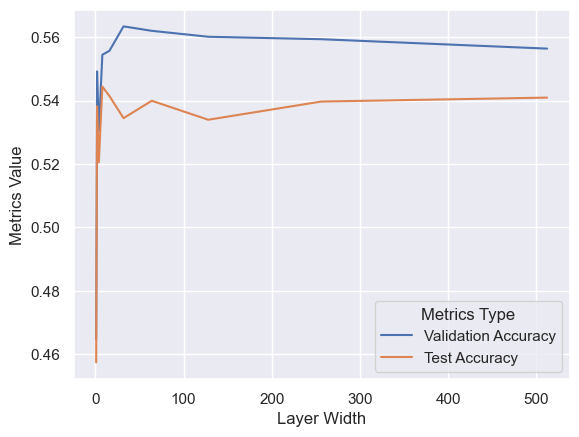

In [93]:
sns.lineplot(accuracy_only, 
             x = "Layer Width",
             y = "Metrics Value",
             hue = "Metrics Type"
             )